# Varifold distances for different derivatives

Here, for a specific subject and structure, we compute the pairwise varifold distances for different derivatives.

In [1]:
import numpy as np
import polpo.preprocessing.dict as ppdict
import polpo.utils as putils
from matplotlib import pyplot as plt
from polpo.mesh.surface import PvSurface
from polpo.mesh.varifold.tuning import SigmaFromLengths
from polpo.preprocessing.load.pregnancy.jacobs import MeshLoader, MeshLoaderFromMri
from polpo.preprocessing.mesh.registration import RigidAlignment

[KeOps] Warning : CUDA was detected, but driver API could not be initialized. Switching to CPU only.


In [2]:
SUBJECT_ID = "01"
STRUCT = "L_Hipp"

SUBSAMPLE = None

We select the varifold kernel [using characteristic lengths](https://geometric-intelligence.github.io/polpo/_generated/notebooks/how_to/varifold_kernel_charlen.html).

In [3]:
sigma_search = SigmaFromLengths(
    ratio_charlen_mesh=2.0,
    ratio_charlen=0.25,
)

## Enigma

In [4]:
mesh_loader = (
    MeshLoader(
        subject_subset=[SUBJECT_ID],
        struct_subset=[STRUCT],
        derivative="enigma",
        as_mesh=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + ppdict.Subsample(SUBSAMPLE)
    + ppdict.DictMap(PvSurface)
)

enigma_meshes = meshes = mesh_loader()

In [5]:
sigma_search.fit([ppdict.ExtractRandomKey()(meshes)])

metric = sigma_search.optimal_metric_

sigma_search.sigma_

np.float64(5.570328027708613)

In [6]:
enigma_dists = dists = putils.pairwise_dists(list(meshes.values()), metric)

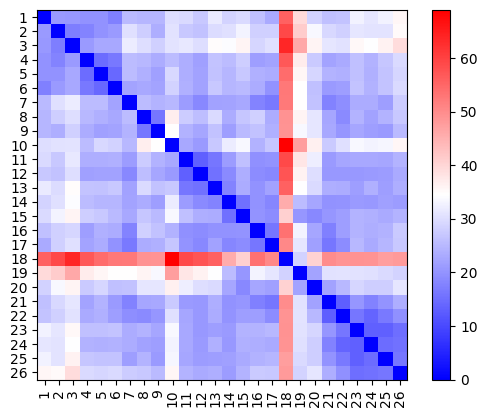

In [7]:
fig, ax = plt.subplots()

im = ax.imshow(dists, cmap="bwr")

plt.colorbar(im)

ax.set_xticks(range(len(meshes)))
ax.set_xticklabels(meshes.keys(), rotation=90)

ax.set_yticks(range(len(meshes)))
ax.set_yticklabels(meshes.keys());

(np.float64(12.865717707277586), np.float64(68.99435137114337))

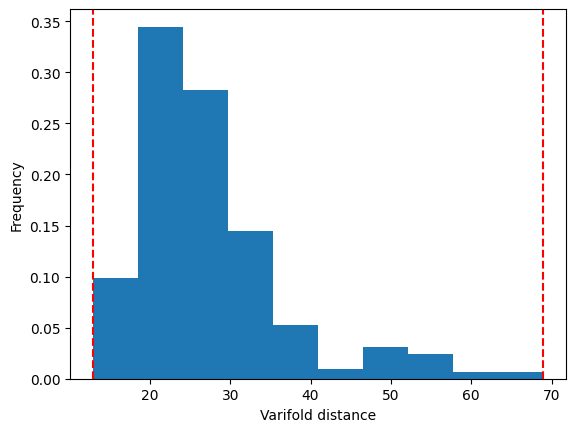

In [8]:
_, ax = plt.subplots()

dists_ = putils.sym_to_triu_vec(dists)
ax.hist(
    dists_,
    weights=1 / len(dists_) * np.ones_like(dists_),
)
ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

min_dist, max_dist = np.amin(dists_), np.amax(dists_)
ax.axvline(min_dist, color="red", linestyle="--")
ax.axvline(max_dist, color="red", linestyle="--")

min_dist, max_dist

## FSL-First

In [9]:
mesh_loader = (
    MeshLoader(
        subject_subset=[SUBJECT_ID],
        struct_subset=[STRUCT],
        session_subset=enigma_meshes.keys(),
        derivative="fsl",
        as_mesh=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + RigidAlignment(known_correspondences=True)
    + ppdict.DictMap(PvSurface)
)


fsl_meshes = meshes = mesh_loader()

In [10]:
sigma_search.fit([ppdict.ExtractRandomKey()(meshes)])

metric = sigma_search.optimal_metric_

sigma_search.sigma_

np.float64(5.975259913460634)

In [11]:
fsl_dists = dists = putils.pairwise_dists(list(meshes.values()), metric)

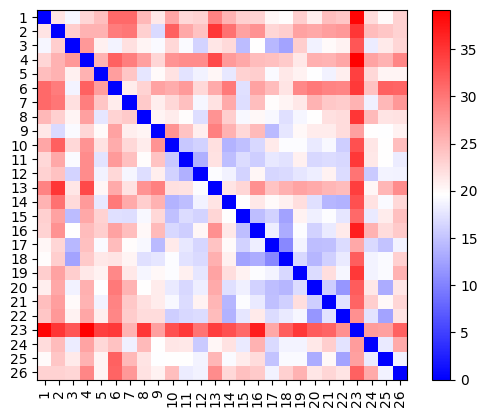

In [12]:
fig, ax = plt.subplots()

im = ax.imshow(dists, cmap="bwr")

plt.colorbar(im)

ax.set_xticks(range(len(meshes)))
ax.set_xticklabels(meshes.keys(), rotation=90)

ax.set_yticks(range(len(meshes)))
ax.set_yticklabels(meshes.keys());

(np.float64(10.466742147306038), np.float64(39.16138619486524))

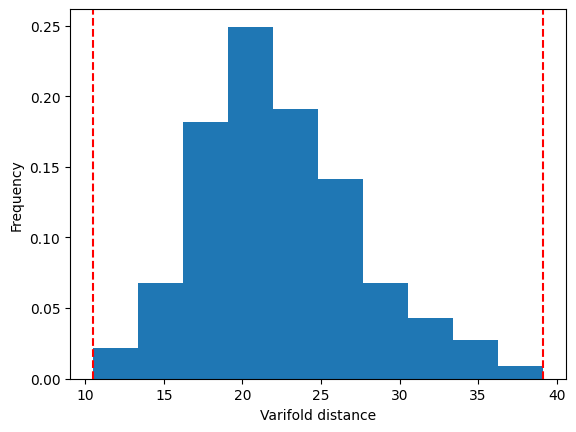

In [13]:
_, ax = plt.subplots()

dists_ = putils.sym_to_triu_vec(dists)
ax.hist(
    dists_,
    weights=1 / len(dists_) * np.ones_like(dists_),
)
ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

min_dist, max_dist = np.amin(dists_), np.amax(dists_)
ax.axvline(min_dist, color="red", linestyle="--")
ax.axvline(max_dist, color="red", linestyle="--")

min_dist, max_dist

## Fast

In [14]:
mesh_loader = (
    MeshLoaderFromMri(
        subject_subset=[SUBJECT_ID],
        struct_subset=[STRUCT],
        session_subset=enigma_meshes.keys(),
        derivative="fast",
        n_jobs=-1,
        split_before_meshing=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + RigidAlignment(known_correspondences=False)
    + ppdict.DictMap(PvSurface)
)

fast_meshes = meshes = mesh_loader()

In [15]:
sigma_search.fit([ppdict.ExtractRandomKey()(meshes)])

metric = sigma_search.optimal_metric_

sigma_search.sigma_

np.float64(7.441282272338867)

In [16]:
fast_dists = dists = putils.pairwise_dists(list(meshes.values()), metric)

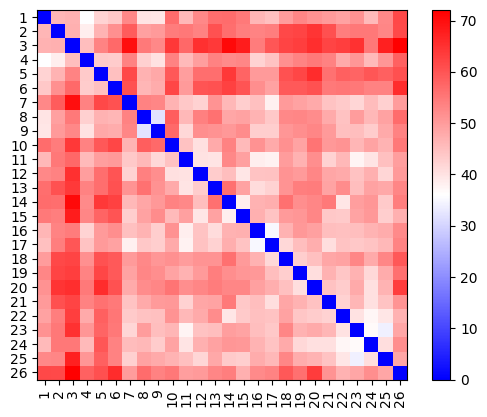

In [17]:
fig, ax = plt.subplots()

im = ax.imshow(dists, cmap="bwr")

plt.colorbar(im)

ax.set_xticks(range(len(meshes)))
ax.set_xticklabels(meshes.keys(), rotation=90)

ax.set_yticks(range(len(meshes)))
ax.set_yticklabels(meshes.keys());

(np.float64(32.28652582902993), np.float64(72.07517844968785))

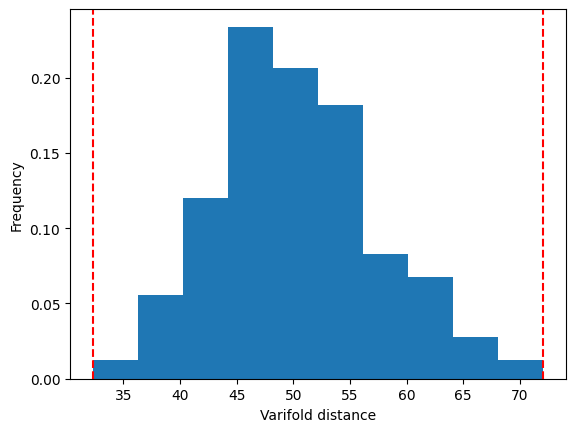

In [18]:
_, ax = plt.subplots()

dists_ = putils.sym_to_triu_vec(dists)
ax.hist(
    dists_,
    weights=1 / len(dists_) * np.ones_like(dists_),
)
ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

min_dist, max_dist = np.amin(dists_), np.amax(dists_)
ax.axvline(min_dist, color="red", linestyle="--")
ax.axvline(max_dist, color="red", linestyle="--")

min_dist, max_dist

## Comparison

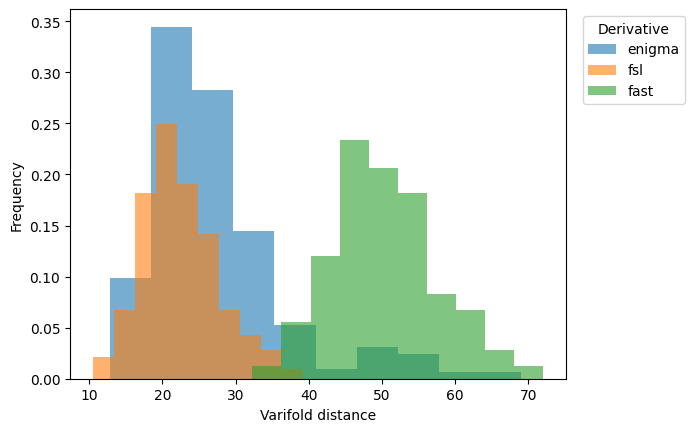

In [19]:
_, ax = plt.subplots()

for label, dists in zip(
    ("enigma", "fsl", "fast"), (enigma_dists, fsl_dists, fast_dists)
):
    dists_ = putils.sym_to_triu_vec(dists)
    ax.hist(
        dists_,
        weights=1 / len(dists_) * np.ones_like(dists_),
        alpha=0.6,
        label=label,
    )

ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

ax.legend(title="Derivative", bbox_to_anchor=(1.02, 1), loc="upper left");

## Further reading


* [Varifold distances between subjects](./varifold_pairwise_distances_subjects.ipynb)